In [3]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
#We load the CSV file into a dataframe
df = pd.read_csv('Student_Performance.csv')
#We use describe() to see the mean and count of rows of the dataframe
df.describe()



,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
#We do a exploratory analysis of our data with head()
df.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0


In [6]:
#Since we have a boolean column (Extracurricular Activities) and we cant use bool values for a lineal regression
#We NEED to change yes and no to 0 and 1, we use this with LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

#We check our data again to see the results
df.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0


In [7]:
#We check for any Null values in our data to continue the cleaning process
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
y = df['Performance Index']

for i in df.columns:
    if (df[i].name != y.name):
     print(i)

Hours Studied
Previous Scores
Extracurricular Activities
Sleep Hours
Sample Question Papers Practiced


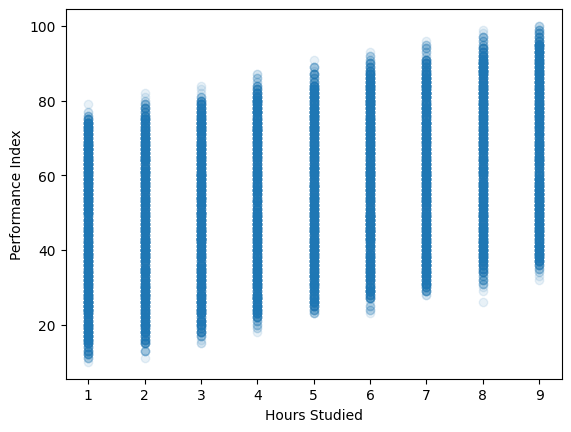

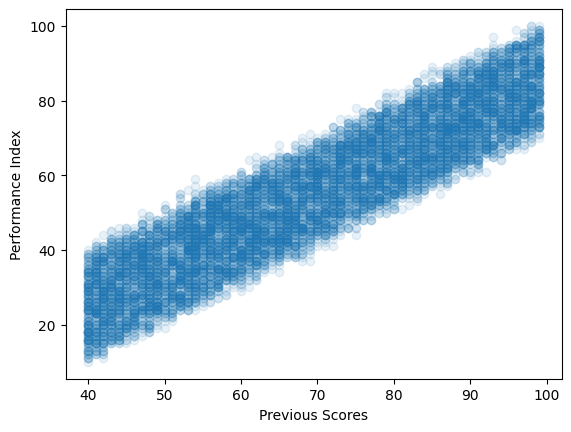

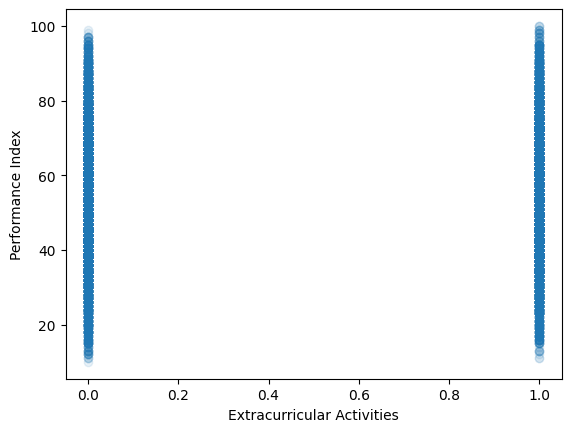

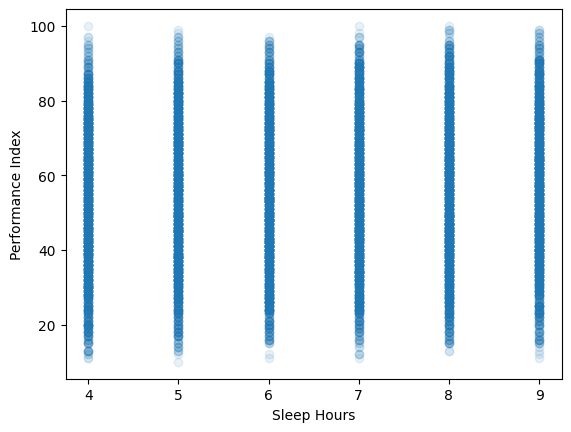

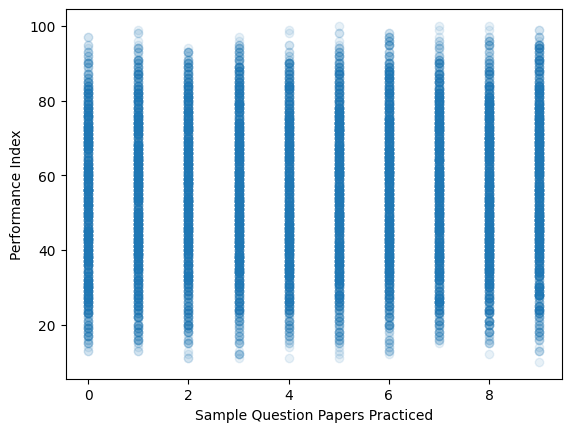

In [ ]:
#Because there are no null values we can start visualizing data with graphs and the heat correlation map
#Target variable would be performance index
y = df['Performance Index']

#For loop to make a graph for every column on the dataframe except Performance Index
for i in df.columns:
    if (df[i].name != y.name):
        plt.scatter(df[i],y, alpha = 0.1)
        plt.xlabel(df[i].name)
        plt.ylabel('Performance Index')
        plt.show()

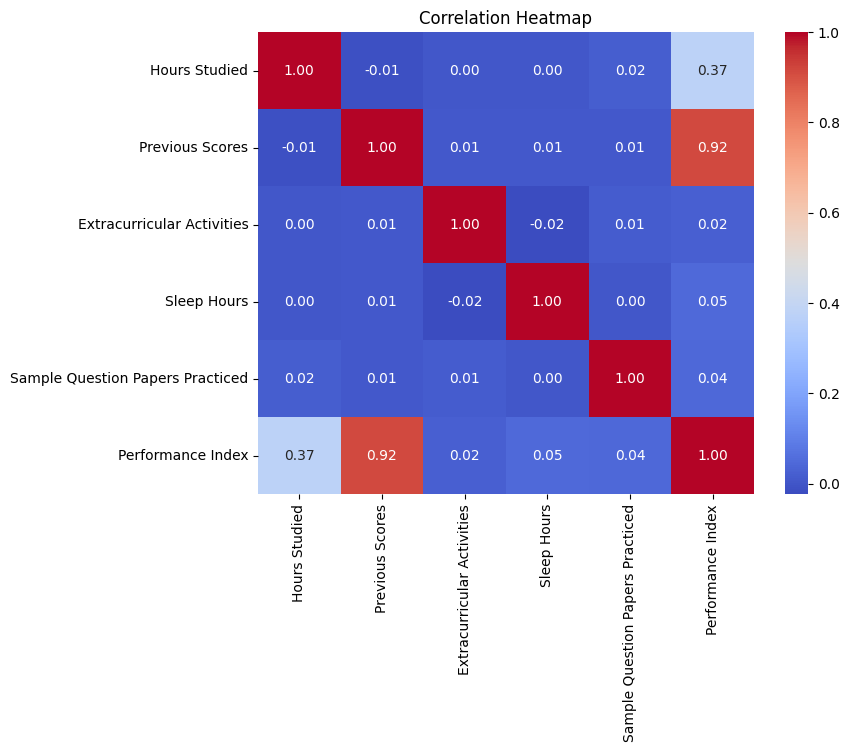

In [11]:
#After analyzing the graphs i see a STRONG correlation in previous scores and a weaker correlation on hours studied
#So next we generate the correlation heat map to confirm our hypothesis
import seaborn as sns

# We build the Correlation Matrix
corr = df.corr()

# We make the correlation Heat map with the seabron library since is easier than matplotlib
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#We just confirmed what we thought previous scores is the one with the most correlation from all columns so 
#We are going to construct and fit the model into this independent variable only.

#We reshape the data to 2D for correct format, X variable only accepts 2D in linear Regression and 1D for y variable
X = np.array(df['Previous Scores']).reshape(-1,1)

linear_model = LinearRegression()
linear_model.fit(X,y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#We predict with our lineal model and visualize data in a table
y_pred = linear_model.predict(X)
table = np.column_stack((y, y_pred))
print(tabulate(table[:5], headers=("Actual Performance Index","Predicted Performance Index"), tablefmt="fancy_grid"))

╒════════════════════════════╤═══════════════════════════════╕
│   Actual Performance Index │   Predicted Performance Index │
╞════════════════════════════╪═══════════════════════════════╡
│                         91 │                       85.188  │
├────────────────────────────┼───────────────────────────────┤
│                         65 │                       67.9528 │
├────────────────────────────┼───────────────────────────────┤
│                         45 │                       36.5239 │
├────────────────────────────┼───────────────────────────────┤
│                         36 │                       37.5377 │
├────────────────────────────┼───────────────────────────────┤
│                         66 │                       60.856  │
╘════════════════════════════╧═══════════════════════════════╛


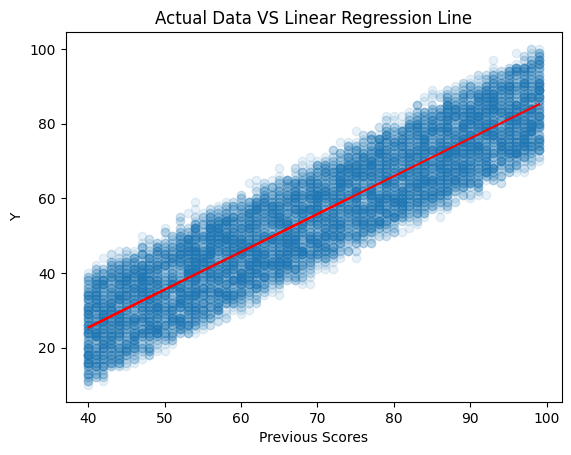

In [14]:
#Well i think the model is kinda off from actual to predicted data so im going to graph the regression line to see how well
#It adheres to data
plt.scatter(X,y,alpha=0.1)
plt.plot(X,y_pred,color='r')
plt.xlabel('Previous Scores')
plt.ylabel('Y')
plt.title('Actual Data VS Linear Regression Line')
plt.show()

In [13]:
#Since line looks good im going to use metrics to see how bad we are doing on the model
r_squared= np.round(r2_score(y, y_pred),4)
print("R squared: ",r_squared)

MAE= np.round(mean_absolute_error(y,y_pred),4)
print("MAE: ", MAE)

RMSE = np.round(np.sqrt(mean_squared_error(y,y_pred)),4)
print("RMSE: ",RMSE)

R squared:  0.8376
MAE:  6.61
RMSE:  7.7427


In [14]:
#Since we have a poor R squared less than 0.9 and we are missing on average 6.61 on index score without counting outliers
#this should be way more low, since the index is out of 100 , 6.61 is considerable for error
#A solution i propose is take study hours also in consideration for the regreation since it had a good correlation with the model too

#We construct the X variable again but we drop the next columns so only studied hours and previous scores are in the X variable
X = df.drop(['Performance Index','Sleep Hours','Sample Question Papers Practiced'], axis=1)
linear_model.fit(X,y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
#We do the prediction with the new variable and visualize it with a table
final_pred = linear_model.predict(X)
table2 = np.column_stack((y,final_pred))

print(tabulate(table2[:5], headers=("Actual_Data","Data_Predicted"), tablefmt="fancy_grid"))



╒═══════════════╤══════════════════╕
│   Actual_Data │   Data_Predicted │
╞═══════════════╪══════════════════╡
│            91 │          91.3724 │
├───────────────┼──────────────────┤
│            65 │          64.8889 │
├───────────────┼──────────────────┤
│            45 │          45.3185 │
├───────────────┼──────────────────┤
│            36 │          37.766  │
├───────────────┼──────────────────┤
│            66 │          66.3276 │
╘═══════════════╧══════════════════╛


In [16]:
#I see we are doing MUCH better in the model when counting studied hours in the equation too
#We finally build our metrics to evaluate the model again but with the new variables

R_squared = np.round(r2_score(y,final_pred),4)
print("R squared: ",R_squared)

MAE= np.round(mean_absolute_error(y,final_pred),4)
print("MAE: ", MAE)

RMSE = np.round(np.sqrt(mean_squared_error(y,final_pred)),4)
print("RMSE: ",RMSE)

R squared:  0.9861
MAE:  1.7995
RMSE:  2.2644


# Conclusions 
We can see a HUGE difference from R squared previously being: 0.8376, to know being: 0.9861 which is a HUGE improvement in our model<p> Also the other 2 metrics went down which is great, this just shows a simulate problem you can encounter while doing a machine learning model <p>Maybe it had poor adjustment to the data and the predictions are a bit off but you can always improve it.